In [128]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize, minmax_scale


In [129]:
data = pd.read_csv('diabetes_dataset.csv')

In [130]:
# sns.pairplot(data, hue='Outcome')

<Axes: >

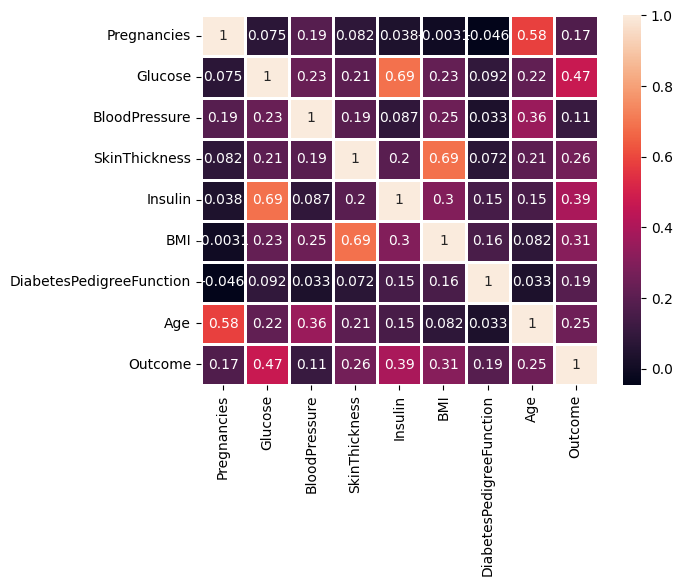

In [131]:
data_corr = data.corr(method='spearman')

correlation = data.corr()
sns.heatmap(data_corr, annot = True, linewidths = 1)


In [132]:
def format_glucose(db):
        db.loc[(db['Glucose'] < 154), 'Glucose'] = 0
        db.loc[(db['Glucose'] >= 154), 'Glucose'] = 1

def format_SkinThickness(db):
        db.loc[(db['SkinThickness'] < 28), 'SkinThickness'] = 0
        db.loc[(db['SkinThickness'] >= 28), 'SkinThickness'] = 1

def format_insulin(db):
        db.loc[(db['Insulin'] < 165), 'Insulin'] = 0
        db.loc[(db['Insulin'] >= 165), 'Insulin'] = 1
        # db.loc[(db['Insulin'] >= 200), 'Insulin'] = 3

def format_age(db):
    db.loc[(db['Age'] < 20), 'Age'] = 0
    db.loc[(db['Age'] >= 20) & (db['Age'] < 40), 'Age'] = 1
    db.loc[(db['Age'] >= 40) & (db['Age'] < 60), 'Age'] = 2
    db.loc[(db['Age'] >= 60), 'Age'] = 3

def format_blood_pressure(db):
    db.loc[(db['BloodPressure'] < 80), 'BloodPressure'] = 0
    db.loc[(db['BloodPressure'] >= 80) & (db['BloodPressure'] < 89), 'BloodPressure'] = 1
    db.loc[(db['BloodPressure'] >= 90) & (db['BloodPressure'] < 99), 'BloodPressure'] = 2
    db.loc[(db['BloodPressure'] > 100), 'BloodPressure'] = 3

def format_pregnancies(db):
    db.loc[(db['Pregnancies'] == 0), 'Pregnancies'] = 0
    db.loc[(db['Pregnancies'] > 0) & (db['Pregnancies'] < 3), 'Pregnancies'] = 1
    db.loc[(db['Pregnancies'] >= 3), 'Pregnancies'] = 2

def format_bmi(db):
    db.loc[(db['BMI'] < 24.9), 'BMI'] = 0
    db.loc[(db['BMI'] >= 24.9) & (db['BMI'] < 29.9), 'BMI'] = 0.25
    db.loc[(db['BMI'] >= 30) & (db['BMI'] < 34.9), 'BMI'] = 0.5
    db.loc[(db['BMI'] >= 35) & (db['BMI'] < 39.9), 'BMI'] = 0.75
    db.loc[(db['BMI'] >= 40), 'BMI'] = 1

# def normalize_2(db):
#         db['Pregnancies'] = db['Pregnancies']/50
#         db['Glucose'] = (db['Glucose']/30)
#         db['BloodPressure'] = db['BloodPressure']/100
#         db['SkinThickness'] = db['SkinThickness']/100
#         db['Insulin'] = db['Insulin']/50
#         db['BMI'] = db['BMI']/75
#         db['Age'] = db['Age']/100

def weights(db):
        db['Glucose'] = db['Glucose']
        db['Insulin'] = db['Insulin']
        db['SkinThickness'] = db['SkinThickness']
        # db['BMI'] = db['BMI'] * 1.2

def fill_na(db):
    feature_cols_mean = ['Pregnancies', 'Age']
    feature_cols_median = ['BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Insulin', 'Glucose']
    mask = db['Outcome'] == 1
    df_1 = db[mask].copy()
    df_0 = db[~mask].copy()
    for col in db.columns:
        # if col != 'Insulin':
        if col in feature_cols_mean:
            value_1 = df_1[col].mean()
            value_0 = df_0[col].mean()
        elif col in feature_cols_median:
            value_1 = df_1[col].median()
            value_0 = df_0[col].median()
                
            df_1[col].fillna(value_1, inplace=True)
            df_0[col].fillna(value_0, inplace=True)

    return pd.concat([df_1, df_0], axis=0)
    

def fill_insulin_knn(data):
    data_test = data.dropna(subset=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
    # data_test = data.dropna(subset=['Glucose', 'BMI', 'DiabetesPedigreeFunction'])
    feature_cols_i = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    # feature_cols_i = ['Glucose', 'BMI', 'Outcome', 'DiabetesPedigreeFunction']

    mask = data_test['Insulin'].isna()

    df_with_nan = data_test[mask]
    df_without_nan = data_test[~mask]
    df_without_nan = df_without_nan.dropna()
    Xi = df_without_nan[feature_cols_i]
    yi = round(df_without_nan.Insulin, 3)

    neigh_i = KNeighborsClassifier(n_neighbors=5)
    neigh_i.fit(Xi, yi)

    df_with_nan = df_with_nan.drop('Insulin', axis=1)

    y_pred_i = neigh_i.predict(df_with_nan)
    df_with_nan['Insulin'] = y_pred_i

    return pd.concat([df_with_nan, df_without_nan], axis=0)

print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta algera o array a seguir.

feature_cols = ['Insulin', 'SkinThickness', 'Glucose']
feature_cols_2 = ['Insulin', 'Outcome', 'SkinThickness', 'Glucose']
# feature_cols_2 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# feature_cols_3 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# feature_cols = ['Insulin', 'SkinThickness']
# feature_cols_2 = ['Insulin', 'Outcome', 'SkinThickness']
# feature_cols = ['Glucose','Insulin', 'BMI', 'DiabetesPedigreeFunction']
# feature_cols_2 = ['Glucose','Insulin', 'BMI', 'Outcome', 'DiabetesPedigreeFunction']

print('\n - Lendo o arquivo com o dataset sobre diabetes')
data = pd.read_csv('diabetes_dataset.csv')
data = data[feature_cols_2]

data_app = pd.read_csv('diabetes_app.csv')
data_app = data_app[feature_cols]

data = fill_na(data)

# format_glucose(data)
# format_glucose(data_app)

# format_blood_pressure(data)
# format_blood_pressure(data_app)

# format_age(data)
# format_age(data_app)

# format_bmi(data)
# format_bmi(data_app)

#format_pregnancies(data)
#format_pregnancies(data_app)

# data = fill_insulin_knn(data)

# format_insulin(data)
# format_insulin(data_app)

# format_SkinThickness(data)

# scaler = minmax_scale()

# data[feature_cols_2] = scaler.fit_transform(data[feature_cols_2])

data[feature_cols] = minmax_scale(data[feature_cols])
data_app[feature_cols] = minmax_scale(data_app[feature_cols])


weights(data)
weights(data_app)
# data_array = normalize(data)
# data = pd.DataFrame(data_array, columns=data.columns)

# data_app_array = normalize(data_app)
# data_app = pd.DataFrame(data_app_array, columns=data_app.columns)

# data['Outcome'] = y


# Criando X and y par ao algorítmo de aprendizagem de máquina.\
X = data[feature_cols]
y = data.Outcome

 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset

 - Lendo o arquivo com o dataset sobre diabetes


<Axes: >

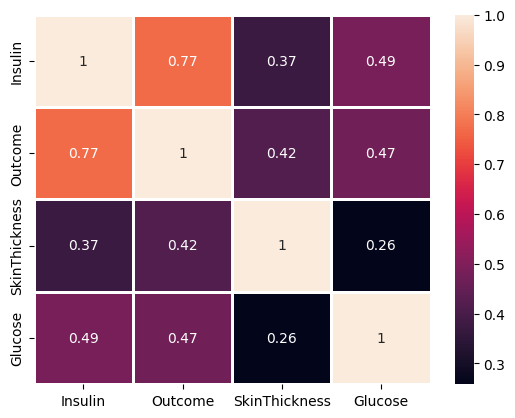

In [133]:
data_corr = data.corr(method='spearman')

correlation = data.corr()
sns.heatmap(data_corr, annot = True, linewidths = 1)

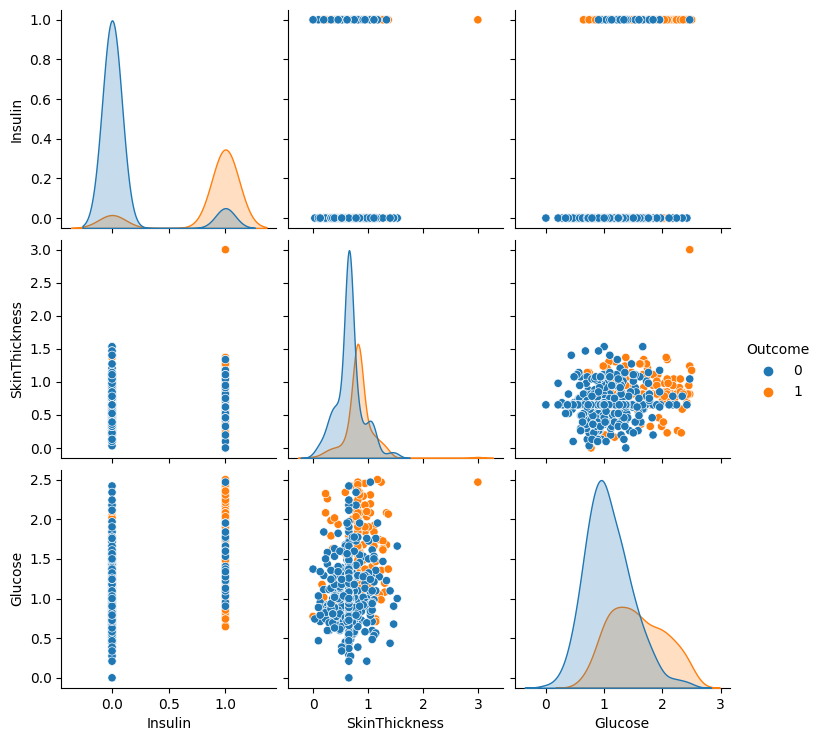

In [134]:
sns.pairplot(data, hue='Outcome')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
test = 0

if not test:
    # Ciando o modelo preditivo para a base trabalhada
    print(' - Criando modelo preditivo')
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, y)

    print(' - Aplicando modelo e enviando para o servidor')
    y_pred = neigh.predict(data_app)

    # Enviando previsões realizadas com o modelo para o servidor
    URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

    #Substituir pela sua chave aqui
    DEV_KEY = "AiDANO"

    # json para ser enviado para o servidor
    data = {'dev_key':DEV_KEY,
            'predictions':pd.Series(y_pred).to_json(orient='values')}
    
    # Enviando requisição e salvando o objeto resposta
    r = requests.post(url = URL, data = data)

    # Extraindo e imprimindo o texto da resposta
    pastebin_url = r.text
    print(" - Resposta do servidor:\n", r.text, "\n")
else:
    print(' - Criando modelo preditivo')
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)

    print(' - Aplicando modelo e enviando para o servidor')
    y_pred = neigh.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)
